In [1]:
import random
import math
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
gan_df = pd.read_csv('Generated_sample.csv')
gan_df.drop('Unnamed: 0' , axis = 1 , inplace =True)

In [3]:
gan_df.head(10)

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,-0.459144,0.085274,0.240084,0.930689,-0.276472,1.350602,-0.170113,-0.917232,-0.463696,0.882105,...,-0.840757,-0.444501,-0.279157,-0.451358,-0.431238,-0.469557,-0.253950,-0.492483,-0.443649,2.718807
1,-0.532525,0.336711,0.221567,0.986129,-0.326226,1.513589,-0.149951,-0.984836,-0.491035,0.953570,...,-0.889071,-0.505402,-0.301250,-0.491262,-0.457482,-0.502724,-0.296481,-0.491243,-0.468101,2.980018
2,-0.524784,0.852361,0.319243,1.160202,-0.371111,1.722526,-0.282636,-1.101251,-0.513065,1.131595,...,-1.111123,-0.449634,-0.373656,-0.483931,-0.546717,-0.642743,-0.282576,-0.600369,-0.557923,3.319430
3,-0.438450,0.588646,-0.271242,0.886539,-0.422280,1.387528,-0.178980,-0.894761,-0.340922,0.995208,...,-0.872311,-0.441382,-0.290450,-0.463084,-0.446277,-0.442476,-0.235062,-0.466870,-0.420811,2.683105
4,-0.410993,0.651405,-0.296635,0.941144,-0.434272,1.381380,-0.213349,-0.885433,-0.370413,1.049478,...,-0.872205,-0.449754,-0.292223,-0.464305,-0.457972,-0.403181,-0.271818,-0.485173,-0.420672,2.735113
5,-0.463084,0.750041,-0.326220,1.065835,-0.507639,1.609692,-0.238769,-1.021632,-0.440928,1.212783,...,-1.028316,-0.512807,-0.343769,-0.540327,-0.530444,-0.485582,-0.309404,-0.599417,-0.504833,3.200650
6,-0.444191,0.660019,-0.298927,0.951819,-0.449466,1.476635,-0.194347,-0.943506,-0.382021,1.100944,...,-0.933851,-0.482515,-0.307304,-0.485461,-0.476420,-0.479861,-0.256112,-0.523545,-0.445831,2.920707
7,-0.609602,0.209315,0.296773,1.223601,-0.355154,1.731387,-0.272223,-1.152826,-0.582774,1.186592,...,-1.058991,-0.558859,-0.319479,-0.545870,-0.538428,-0.503069,-0.236482,-0.651681,-0.535902,3.515975
8,-0.560382,0.416730,0.280396,1.023498,-0.368008,1.626376,-0.205847,-1.074645,-0.538324,1.041522,...,-0.984167,-0.543986,-0.308810,-0.550361,-0.486102,-0.550879,-0.307589,-0.563191,-0.525944,3.234569
9,-0.425611,0.729029,-0.322086,1.033918,-0.475782,1.522625,-0.232831,-0.964269,-0.407366,1.166715,...,-0.985910,-0.489929,-0.327681,-0.514455,-0.501794,-0.432515,-0.285933,-0.560454,-0.472245,3.013362


In [4]:
gan_df.Label = gan_df.Label.apply(lambda x : math.floor(x))

In [5]:
print(gan_df['Label'].value_counts())
gan_df.shape

3    27967
2    21471
4      546
5       15
6        1
Name: Label, dtype: int64


(50000, 79)

In [6]:
## implement Fliping Function 
labelFlibbed = []
RowData = []
def RandomLabelFlipFunction(df , percentage):
    n = len(df['Label'])
    percent = percentage
    for i in range(n):
        if i in random.sample(list(range(n)),int(percent*n)):
            labelFlibbed.append(df['Label'][i]==0)
            value = np.array(df.iloc[i][:-1])
            RowData.append(value)

        else:
            labelFlibbed.append(df['Label'][i])
            value = np.array(df.iloc[i][:-1])
            RowData.append(value)
    return RowData , labelFlibbed

In [7]:
RowData ,labelFlibbed =  RandomLabelFlipFunction(gan_df , 0.75)

In [8]:
print("labelFlibbed", len(labelFlibbed))
print("RowData", len(RowData))

labelFlibbed 50000
RowData 50000


In [9]:
df = pd.read_csv("Normalized.csv")

In [10]:
# the functions: https://www.kaggle.com/flaviobossolan/stratified-sampling-python/notebook
def __smpl_size(population, size):
        if size is None :
            cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
            n = round(cochran_n/(1+((cochran_n -1) /population)))
        elif size >= 0 and size < 1:
                n = round(population * size)
        elif size < 0:
                    raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
        elif size >= 1:
                        n = size
        return n

def stratified_sample(df, strata, size=None, seed=None, keep_index= False):  
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
                
        
         # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)
    
    return stratified_df


In [11]:
df = stratified_sample(df=df, strata=['Label'], size=0.05)

<ipython-input-10-767bd368ae5f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['size'] = 1


In [12]:
df.head(10)

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,1.702803,-1.005514,-1.304105,-0.439685,-1.618463,-1.350729,-1.593125,-0.995524,-1.642144,-0.715963,...,0.849335,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
1,-0.527523,0.415149,0.317806,-1.657288,-1.618463,-1.350729,-1.593125,-0.995524,-1.642144,-0.715963,...,0.849335,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2,-0.873506,0.109941,-0.234635,0.121260,0.224049,0.149930,0.145314,1.181979,0.442397,-0.715963,...,2.307547,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
3,-0.527523,0.196716,0.317806,0.701949,0.961764,0.747261,1.265571,-0.995524,1.342611,1.566371,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
4,-0.527523,1.014435,0.317806,-0.439685,-1.618463,-1.350729,-1.593125,-0.995524,-1.642144,-0.715963,...,0.849335,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
5,-0.873506,-0.852092,-0.234635,0.121260,0.179065,0.127902,0.096739,1.139936,0.374291,-0.715963,...,2.307547,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
6,-0.873506,1.291322,-0.234635,0.121260,0.360765,0.283714,0.341307,1.260994,0.653387,0.909971,...,-0.908598,2.075516,-0.279942,2.076086,2.078148,1.997859,-0.297011,1.997637,1.998632,0
7,-0.873506,0.062468,-0.234635,0.121260,0.115453,0.097815,0.028092,1.079077,0.279103,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
8,1.683059,-1.099979,-1.304105,-0.439685,-1.618463,-1.350729,-1.593125,-0.995524,-1.642144,-0.715963,...,0.849335,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
9,1.691897,-1.089239,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0


In [13]:
print(df['Label'].value_counts())
print(df.shape)

0    113566
3     18987
4      7940
2       692
5       109
1        98
6         2
Name: Label, dtype: int64
(141394, 79)


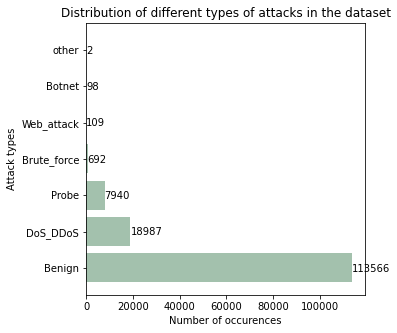

In [14]:
plt.figure(figsize=(5,5))

Labels = ('Benign', 'DoS_DDoS', 'Probe', 'Brute_force', 'Web_attack',  'Botnet', 'other')
y_pos = np.arange(len(Labels)) 
amount = df['Label'].value_counts()# [1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, Labels)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))    
plt.show()

In [15]:
training_data = df.sample(frac=0.7, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}") 

No. of training examples: 98976
No. of testing examples: 42418


In [16]:
print(training_data['Label'].value_counts())
training_data.shape

0    79426
3    13337
4     5581
2      489
5       73
1       70
Name: Label, dtype: int64


(98976, 79)

In [17]:
print(testing_data['Label'].value_counts())
testing_data.shape

0    34140
3     5650
4     2359
2      203
5       36
1       28
6        2
Name: Label, dtype: int64


(42418, 79)

In [18]:
training_data_gan = pd.concat([gan_df, training_data])  
training_data_gan.shape

(148976, 79)

In [19]:
#Splitting dataset into features and labels.
#labels = df['Label']
#features = df.loc[:, df.columns != 'Label']

labels_train = training_data['Label']
features_train = training_data.loc[:, training_data.columns != 'Label']

labels_train_gan = training_data_gan['Label']
features_train_gan = training_data_gan.loc[:, training_data_gan.columns != 'Label']

labels_test = testing_data['Label']
features_test = testing_data.loc[:, testing_data.columns != 'Label']

In [20]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().
#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.3)
features_train.shape, features_test.shape, labels_train.shape, labels_test.shape, features_train_gan.shape,labels_train_gan.shape


((98976, 78), (42418, 78), (98976,), (42418,), (148976, 78), (148976,))

In [21]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    fig, ax = plt.subplots(figsize=(10, 10))
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        plot_confusion_matrix(clf, X_train, y_train,ax=ax) 
        plt.show() 
        
        
        

    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        plot_confusion_matrix(clf, X_test, y_test,ax=ax) 
        plt.show()

In [22]:
clf = LogisticRegression(random_state=42)
clf.fit(features_train, labels_train)

/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Train Result:

accuracy score: 0.9891

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     79426
           1       1.00      0.39      0.56        70
           2       0.84      1.00      0.91       489
           3       0.96      0.98      0.97     13337
           4       0.99      1.00      1.00      5581
           5       0.00      0.00      0.00        73

    accuracy                           0.99     98976
   macro avg       0.80      0.73      0.74     98976
weighted avg       0.99      0.99      0.99     98976




/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix: 
 [[78731     0    93   562    40     0]
 [   43    27     0     0     0     0]
 [    0     0   489     0     0     0]
 [  256     0     0 13081     0     0]
 [    5     0     0     5  5571     0]
 [   71     0     0     2     0     0]]



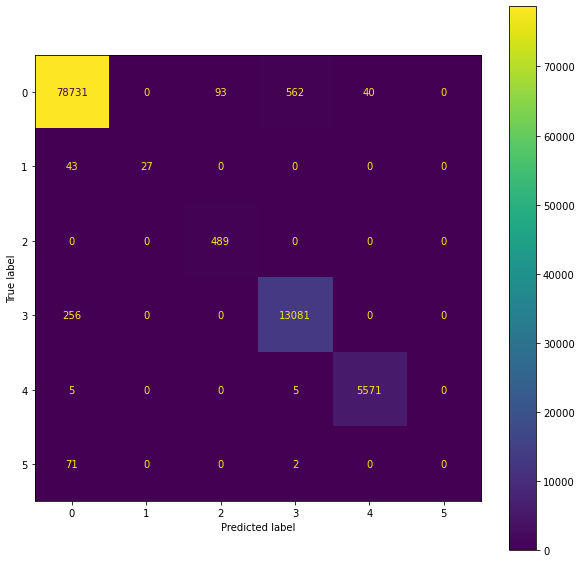

In [23]:
print_score(clf, features_train,labels_train, features_test, labels_test, train=True)
#training result

Test Result:

accuracy score: 0.9882

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     34140
           1       0.80      0.29      0.42        28
           2       0.85      0.99      0.92       203
           3       0.95      0.98      0.97      5650
           4       0.99      1.00      0.99      2359
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00         2

    accuracy                           0.99     42418
   macro avg       0.66      0.61      0.61     42418
weighted avg       0.99      0.99      0.99     42418


Confusion Matrix: 
 [[33821     2    32   268    17     0     0]
 [   20     8     0     0     0     0     0]
 [    2     0   200     1     0     0     0]
 [  115     0     0  5534     1     0     0]
 [    1     0     2     3  2353     0     0]
 [   36     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0]]



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


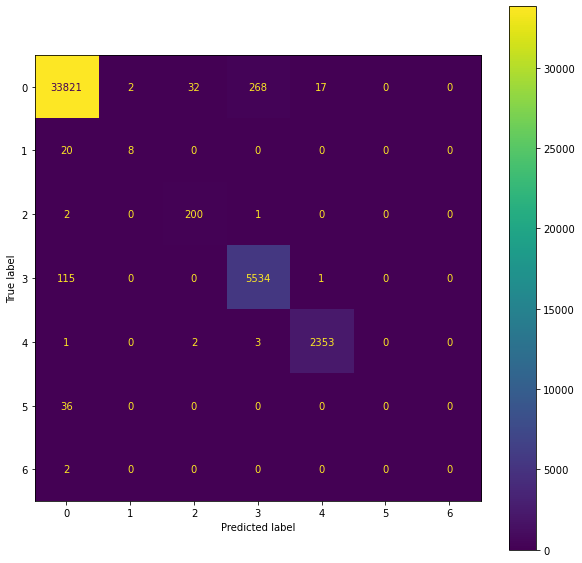

In [24]:
print_score(clf, features_train,labels_train, features_test, labels_test, train=False)
#testing result

In [25]:
clf2 = LogisticRegression(random_state=42)
clf2.fit(features_train_gan, labels_train_gan)

/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Train Result:

accuracy score: 0.9586

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     79426
           1       0.86      0.17      0.29        70
           2       0.92      0.87      0.90     21960
           3       0.91      0.96      0.93     41304
           4       0.97      0.92      0.95      6127
           5       0.00      0.00      0.00        88
           6       0.00      0.00      0.00         1

    accuracy                           0.96    148976
   macro avg       0.67      0.56      0.58    148976
weighted avg       0.96      0.96      0.96    148976


Confusion Matrix: 
 [[78386     2   292   650    94     1     1]
 [   58    12     0     0     0     0     0]
 [   99     0 19190  2671     0     0     0]
 [  330     0  1348 39587    39     0     0]
 [   14     0     8   468  5637     0     0]
 [   72     0     0     5    11     0     0]
 [    0     0     0     0     1     0     0]]



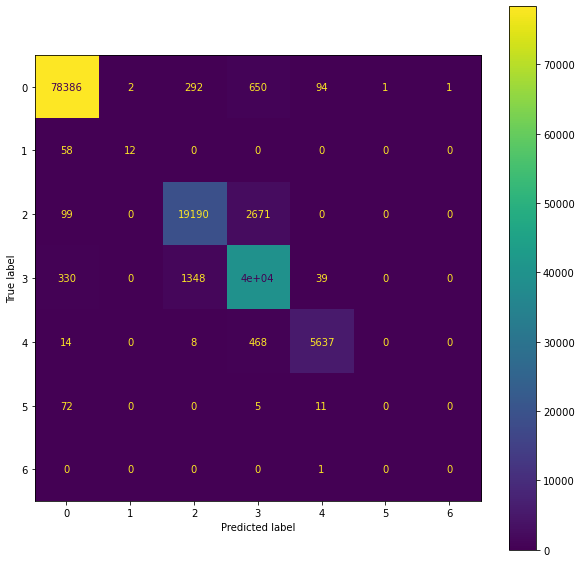

In [26]:
print_score(clf2, features_train_gan,labels_train_gan, features_test, labels_test, train=True)
#training result

Test Result:

accuracy score: 0.9800

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     34140
           1       0.60      0.11      0.18        28
           2       0.35      0.55      0.42       203
           3       0.94      0.96      0.95      5650
           4       0.98      0.99      0.99      2359
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00         2

    accuracy                           0.98     42418
   macro avg       0.55      0.51      0.50     42418
weighted avg       0.98      0.98      0.98     42418


Confusion Matrix: 
 [[33667     2   131   290    48     2     0]
 [   25     3     0     0     0     0     0]
 [   43     0   111    49     0     0     0]
 [  130     0    75  5444     1     0     0]
 [    6     0     4     4  2345     0     0]
 [   36     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0]]



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


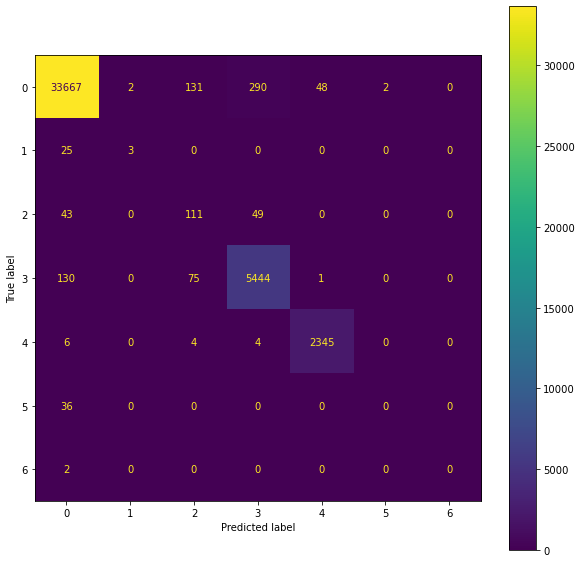

In [27]:
print_score(clf2, features_train_gan,labels_train_gan, features_test, labels_test, train=False)
#testing result

In [29]:
clf3 = DecisionTreeClassifier(random_state=0, max_depth=5) #42
clf3.fit(features_train, labels_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

Train Result:

accuracy score: 0.9808



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     79426
           1       0.00      0.00      0.00        70
           2       0.97      0.58      0.73       489
           3       0.92      0.98      0.95     13337
           4       0.99      0.99      0.99      5581
           5       0.00      0.00      0.00        73

    accuracy                           0.98     98976
   macro avg       0.65      0.59      0.61     98976
weighted avg       0.98      0.98      0.98     98976


Confusion Matrix: 
 [[78205     0     8  1162    51     0]
 [   70     0     0     0     0     0]
 [  200     0   286     3     0     0]
 [  296     0     0 13041     0     0]
 [   30     0     0     4  5547     0]
 [   73     0     0     0     0     0]]



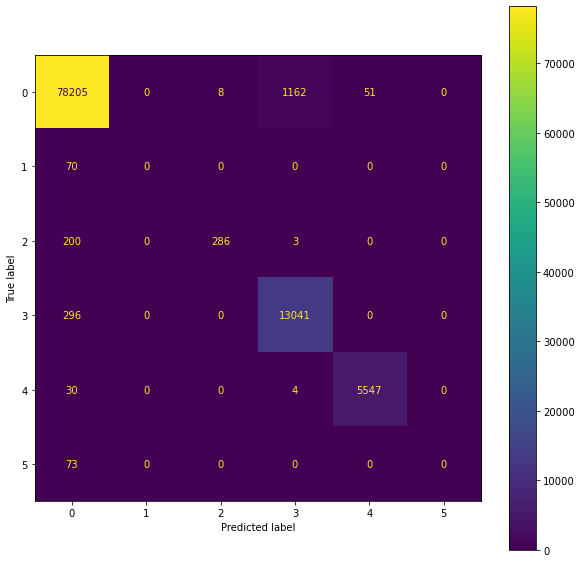

In [30]:
print_score(clf3, features_train,labels_train, features_test, labels_test, train=True)
#training result

Test Result:

accuracy score: 0.9812

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     34140
           1       0.00      0.00      0.00        28
           2       0.98      0.56      0.71       203
           3       0.92      0.98      0.95      5650
           4       0.99      0.99      0.99      2359
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00         2

    accuracy                           0.98     42418
   macro avg       0.55      0.50      0.52     42418
weighted avg       0.98      0.98      0.98     42418


Confusion Matrix: 
 [[33640     0     2   471    27     0     0]
 [   28     0     0     0     0     0     0]
 [   89     0   113     1     0     0     0]
 [  122     0     0  5528     0     0     0]
 [   19     0     0     0  2340     0     0]
 [   36     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0]]



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


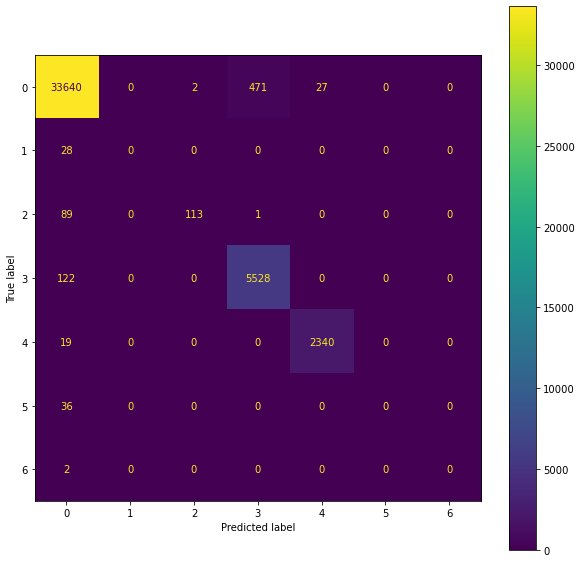

In [31]:
print_score(clf3, features_train,labels_train, features_test, labels_test, train=False)
#testing result

In [32]:
clf4 = DecisionTreeClassifier(random_state=0, max_depth=5)
clf4.fit(features_train_gan, labels_train_gan)

DecisionTreeClassifier(max_depth=5, random_state=0)

Train Result:

accuracy score: 0.9769



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     79426
           1       0.00      0.00      0.00        70
           2       0.97      0.96      0.97     21960
           3       0.95      0.98      0.96     41304
           4       0.99      0.99      0.99      6127
           5       0.94      0.17      0.29        88
           6       0.00      0.00      0.00         1

    accuracy                           0.98    148976
   macro avg       0.69      0.58      0.60    148976
weighted avg       0.98      0.98      0.98    148976


Confusion Matrix: 
 [[77951     0    12  1412    51     0     0]
 [   70     0     0     0     0     0     0]
 [  200     0 21100   660     0     0     0]
 [  294     0   574 40419    17     0     0]
 [   30     0     0    51  6046     0     0]
 [   73     0     0     0     0    15     0]
 [    0     0     0     0     0     1     0]]



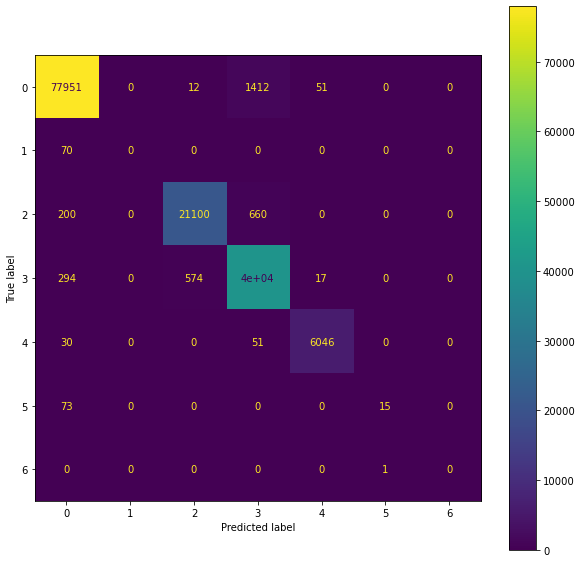

In [33]:
print_score(clf4, features_train_gan,labels_train_gan, features_test, labels_test, train=True)
#training result

Test Result:

accuracy score: 0.9788

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     34140
           1       0.00      0.00      0.00        28
           2       0.96      0.56      0.70       203
           3       0.91      0.98      0.94      5650
           4       0.99      0.99      0.99      2359
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00         2

    accuracy                           0.98     42418
   macro avg       0.55      0.50      0.52     42418
weighted avg       0.98      0.98      0.98     42418


Confusion Matrix: 
 [[33540     0     5   568    27     0     0]
 [   28     0     0     0     0     0     0]
 [   89     0   113     1     0     0     0]
 [  122     0     0  5528     0     0     0]
 [   19     0     0     1  2339     0     0]
 [   36     0     0     0     0     0     0]
 [    1     0     0     1     0     0     0]]



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


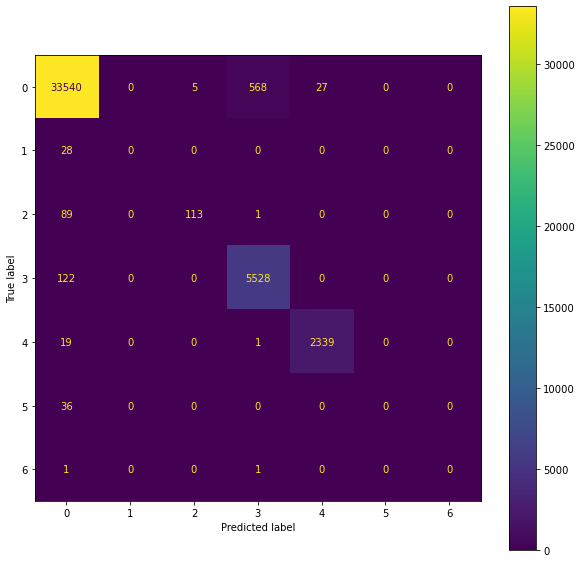

In [34]:
print_score(clf4, features_train_gan,labels_train_gan, features_test, labels_test, train=False)
#testing result